In [149]:
# importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [140]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [141]:
countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
0,1,ABW,ABW,Aruba,Aruba,Aruba,Aruba,Aruba,Netherlands,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1533
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
3,4,AIA,AIA,Anguilla,Anguilla,Anguilla,Anguilla,Anguilla,United Kingdom,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3


In [142]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,None,Saint Barthelemy,None,NaN,BLM,Saint Barthelemy
1,None,Jersey,None,NaN,JEY,Jersey
2,None,Siachen Glacier,None,NaN,KAS,Siachen Glacier
3,None,Indian Ocean Territories,None,NaN,IOA,Indian Ocean Territories
4,None,South Georgia and South Sandwich Islands,None,NaN,SGS,South Georgia and South Sandwich Islands


In [2]:

def sample_var(low=0., high=.5, dist='unif', n=1, seed=42):
    '''
    function to sample var values from a probability distribution
    
    
    low: can be used as lower bound if dist=='unif' or first-order moment o.w.
    high: can be used as upper bound if dist=='unif' or second-order moment o.w.
    '''
    
    if dist=='unif':
        return np.random.uniform(low,high,n)
    if dist=='norm':
        return np.random.normal(low, high, n)
    else:
        return None
    
sample_var(dist='norm')

array([-0.32868605])

In [632]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp1_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [633]:
len(df.ISO3.unique())

234

In [634]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,Antigua and Barbuda,ATG,256040250.0


In [640]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-food_waste
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in list(LS_2000_df.ISO3.unique()):
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3) * get_population(X, year=2000) / 5976296907.
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + feed_food_factor * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = feed_food_factor * (LS_2000 - LS)
    
    production = food + LS + feed_now_food
    demand = get_population(X, year) * pop_fact * ADER
    
    return production/demand

cal_suff(df[df.ISO3=='BDI'], cntry='BDI', year=2000)

0.5507443716041809

In [641]:
def custom_categorization_new(row):
    
    if row['calSuff2000'] > 3 and row['trade'] > 0.8: 
        return 'Exporters' # e.g Brazil, USA, France, Denmark (Greenland)
    
    elif (row['delta_CalSuff_avg'] > 0.6 and row['delta_consistency'] >= 3) or (row['calSuff2000'] > 1.2 and row['delta_consistency'] >= 3 and row['delta_CalSuff_avg'] > 0.2):
        return 'Increasing sufficiency'
    
    elif row['trade'] < 0.1:
        return 'Importers'
    
    elif row['calSuff2000'] < 1.2 and (row['delta_consistency'] <= 1 or row['highest_ssp'] < 0.9):
        return 'Most vulnerable'
    
    elif (row['lowest_ssp'] < 1 or row['calSuff2000'] < 2) and row['delta_CalSuff_avg'] < -0.2 and row['delta_consistency'] <= 1:
        return 'Newly vulnerable'
    
    elif row['calSuff2000'] < 1.2 and row['delta_consistency'] >= 2 and row['lowest_ssp'] > 0.9*row['calSuff2000']:
        return 'Vulnerable but improving'
    
    elif row['delta_consistency'] <= 2 and row['delta_CalSuff_avg'] < -0.1 and row['calSuff2000'] > 2:
        return 'Decreasing but not as vulnerable'
    
    elif row['delta_consistency'] > 0 and row['delta_consistency'] < 4:
        return 'Highly variable'  
    
    
    return 'Outliers'

In [642]:
# food_waste = .29 * np.array([.5, .6, .7, .8, .9, 1., 1.1, 1.2, 1.3, 1.4, 1.5])
values = np.round(np.array([.5, .75, 1., 1.25, 1.5]), 2)

cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']


for value in list(values):    

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    
    for country in list(countries):
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')

    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, year=2050, pop_fact=value)

        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')

    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies.dropna(subset=['ssp1','ssp2','ssp3','ssp4','ssp5'])  
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category')
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [604]:
stacked_df.to_csv('sa_pop_fact_170.csv')

## SA for food waste

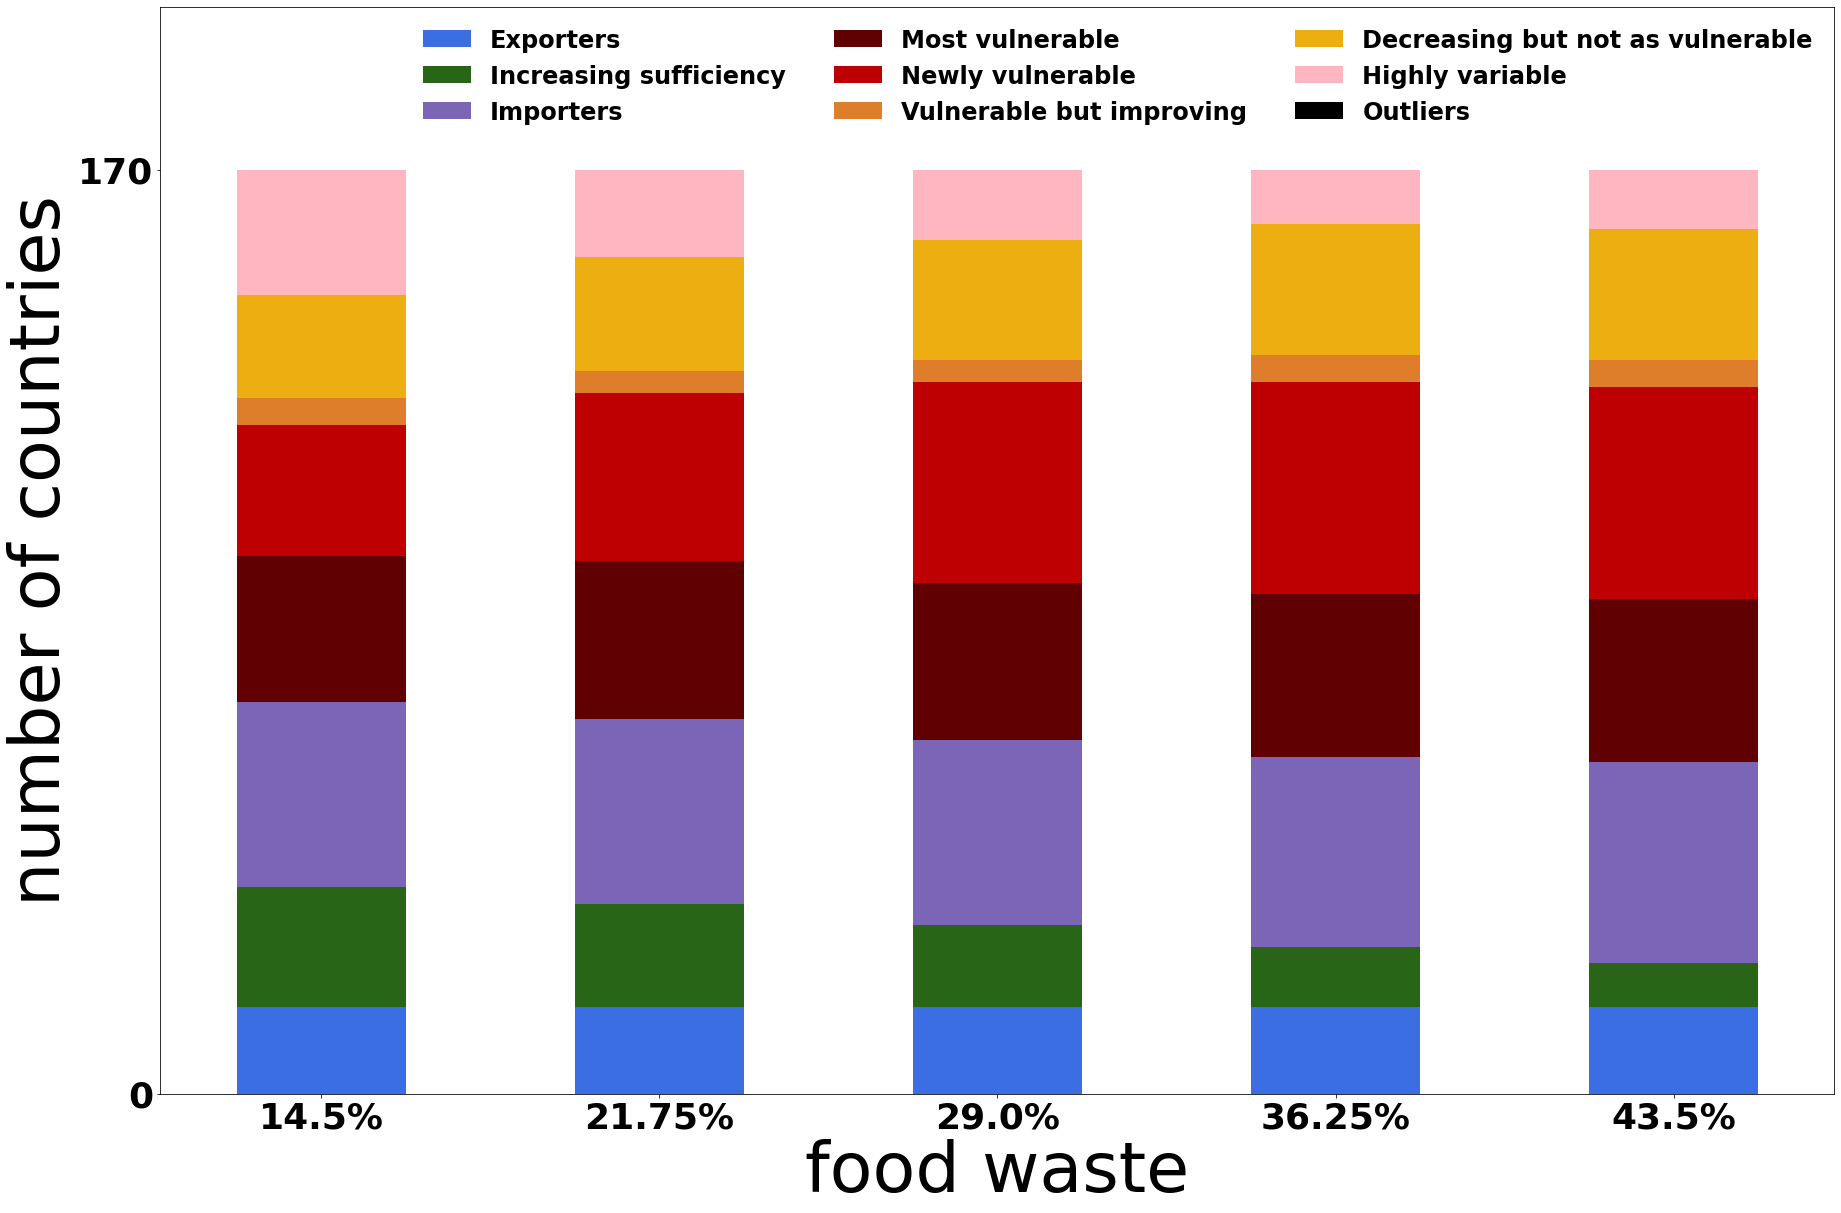

In [598]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')

header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [str(e)+'%' for e in list(np.round(29 * np.array([.5, .75, 1., 1.25, 1.5]),2))]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([22, 19, 15, 11,  8])
cat3 = np.array([34, 34, 34, 35, 37])
cat4 = np.array([27, 29, 29, 30, 30])
cat5 = np.array([24, 31, 37, 39, 39])
cat6 = np.array([5, 4, 4, 5, 5])
cat7 = np.array([19, 21, 22, 24, 24])
cat8 = np.array([23, 16, 13, 10, 11])
cat9 = np.array([0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('food waste', fontsize=70)
plt.ylim([0,200])
plt.yticks([0, 170], fontsize=36)
plt.ylabel('number of countries', fontsize=70)


p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0., fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. food waste')
plt.show()

## SA w.r.t. feed food factor

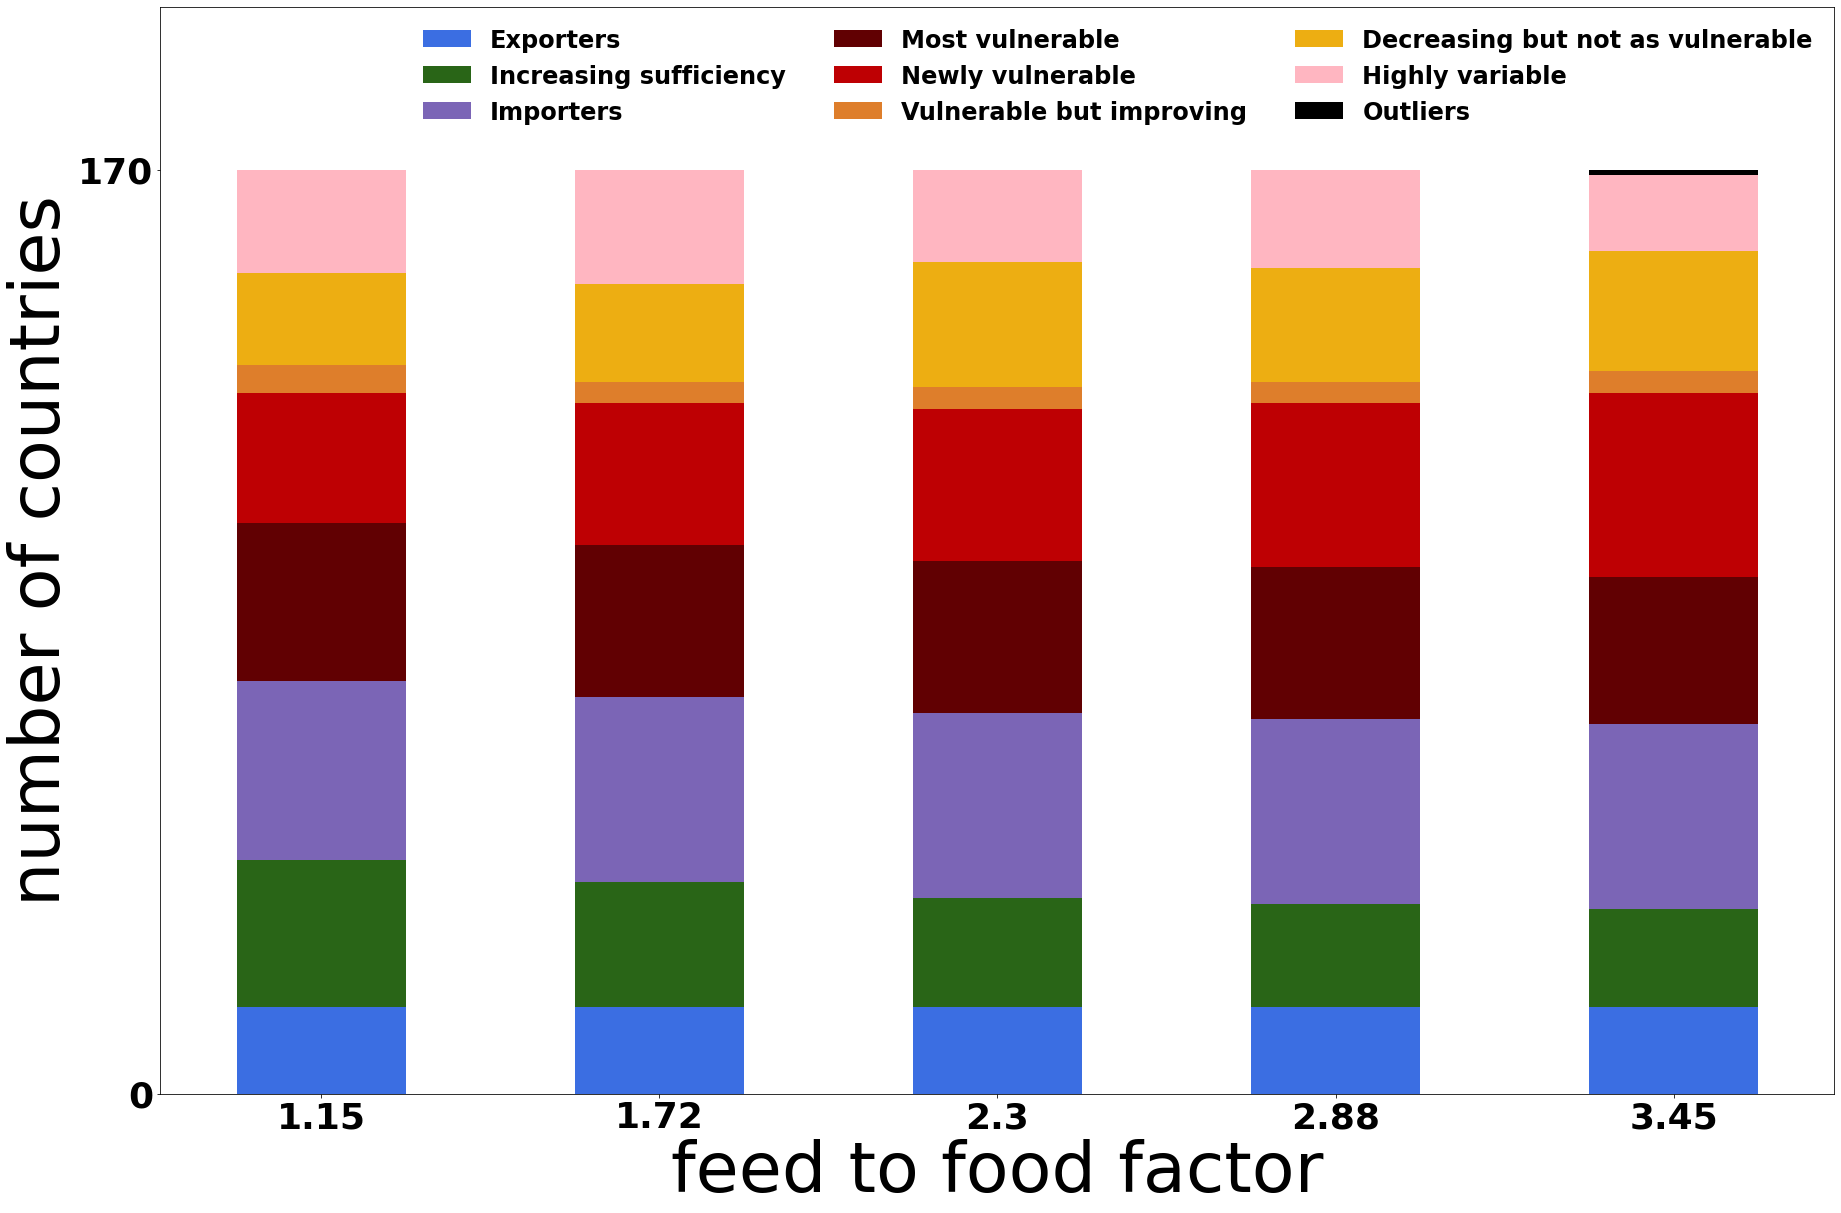

In [599]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = np.round(2.3 * np.array([0.5 , 0.75, 1.  , 1.25, 1.5]),2)

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([27, 23, 20, 19, 18])
cat3 = np.array([33, 34, 34, 34, 34])
cat4 = np.array([29, 28, 28, 28, 27])
cat5 = np.array([24, 26, 28, 30, 34])
cat6 = np.array([5, 4, 4, 4, 4])
cat7 = np.array([17, 18, 23, 21, 22])
cat8 = np.array([19, 21, 17, 18, 14])
cat9 = np.array([0, 0, 0, 0, 1])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('feed to food factor', fontsize=70)
plt.ylim([0,200])
plt.yticks([0, 170],fontsize=36)
plt.ylabel('number of countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA w.r.t. diet

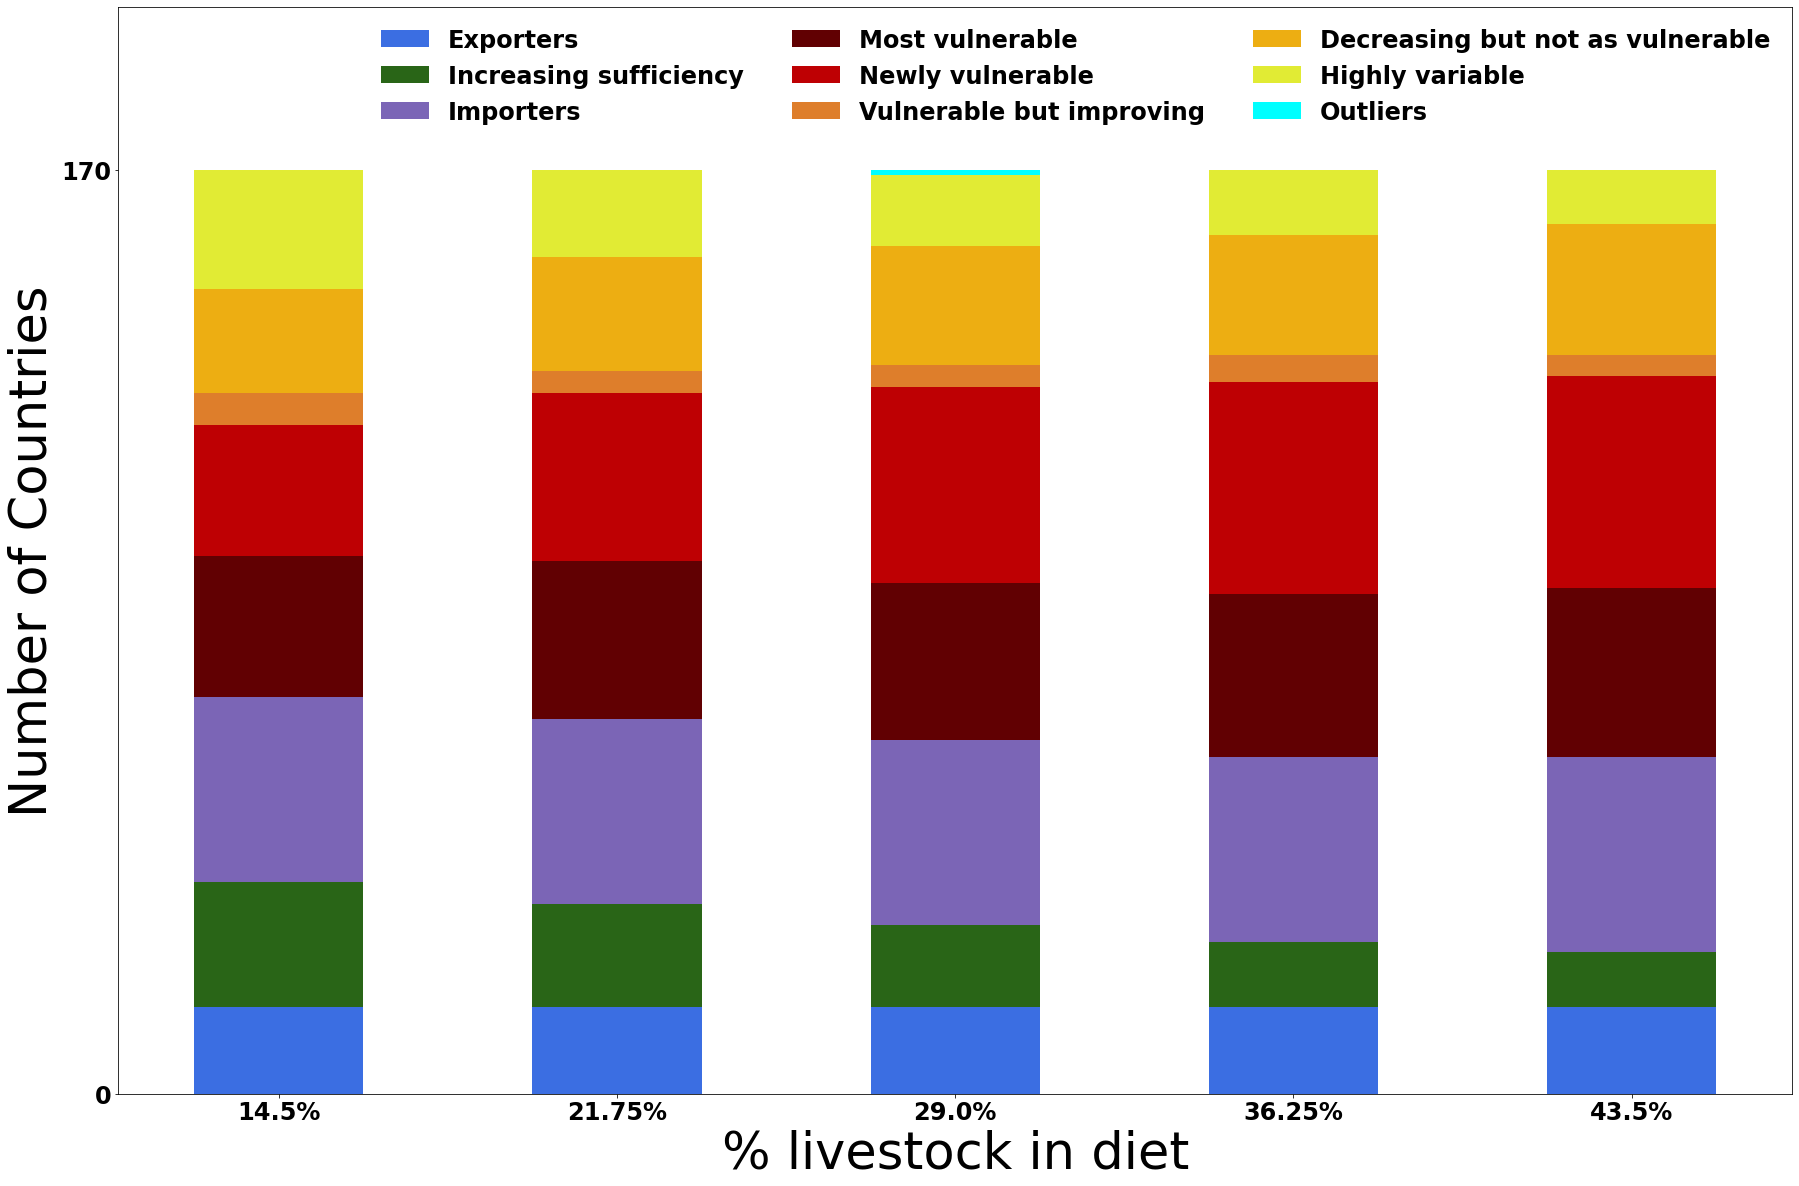

In [524]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [str(e)+'%' for e in list(np.round(29 * np.array([.5, .75, 1., 1.25, 1.5]),2))]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([23, 19, 15, 12, 10])
cat3 = np.array([34, 34, 34, 34, 36])
cat4 = np.array([26, 29, 29, 30, 31])
cat5 = np.array([24, 31, 36, 39, 39])
cat6 = np.array([6, 4, 4, 5, 4])
cat7 = np.array([19, 21, 22, 22, 24])
cat8 = np.array([22, 16, 13, 12, 10])
cat9 = np.array([0, 0, 1, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('% livestock in diet', fontsize=70)
plt.ylim([0,200])
plt.yticks([0, 170], fontsize=36)
plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA w.r.t. pop_fact

In [548]:
[0, 1, 0, 0, 0]

array([37, 67, 77, 82, 84])

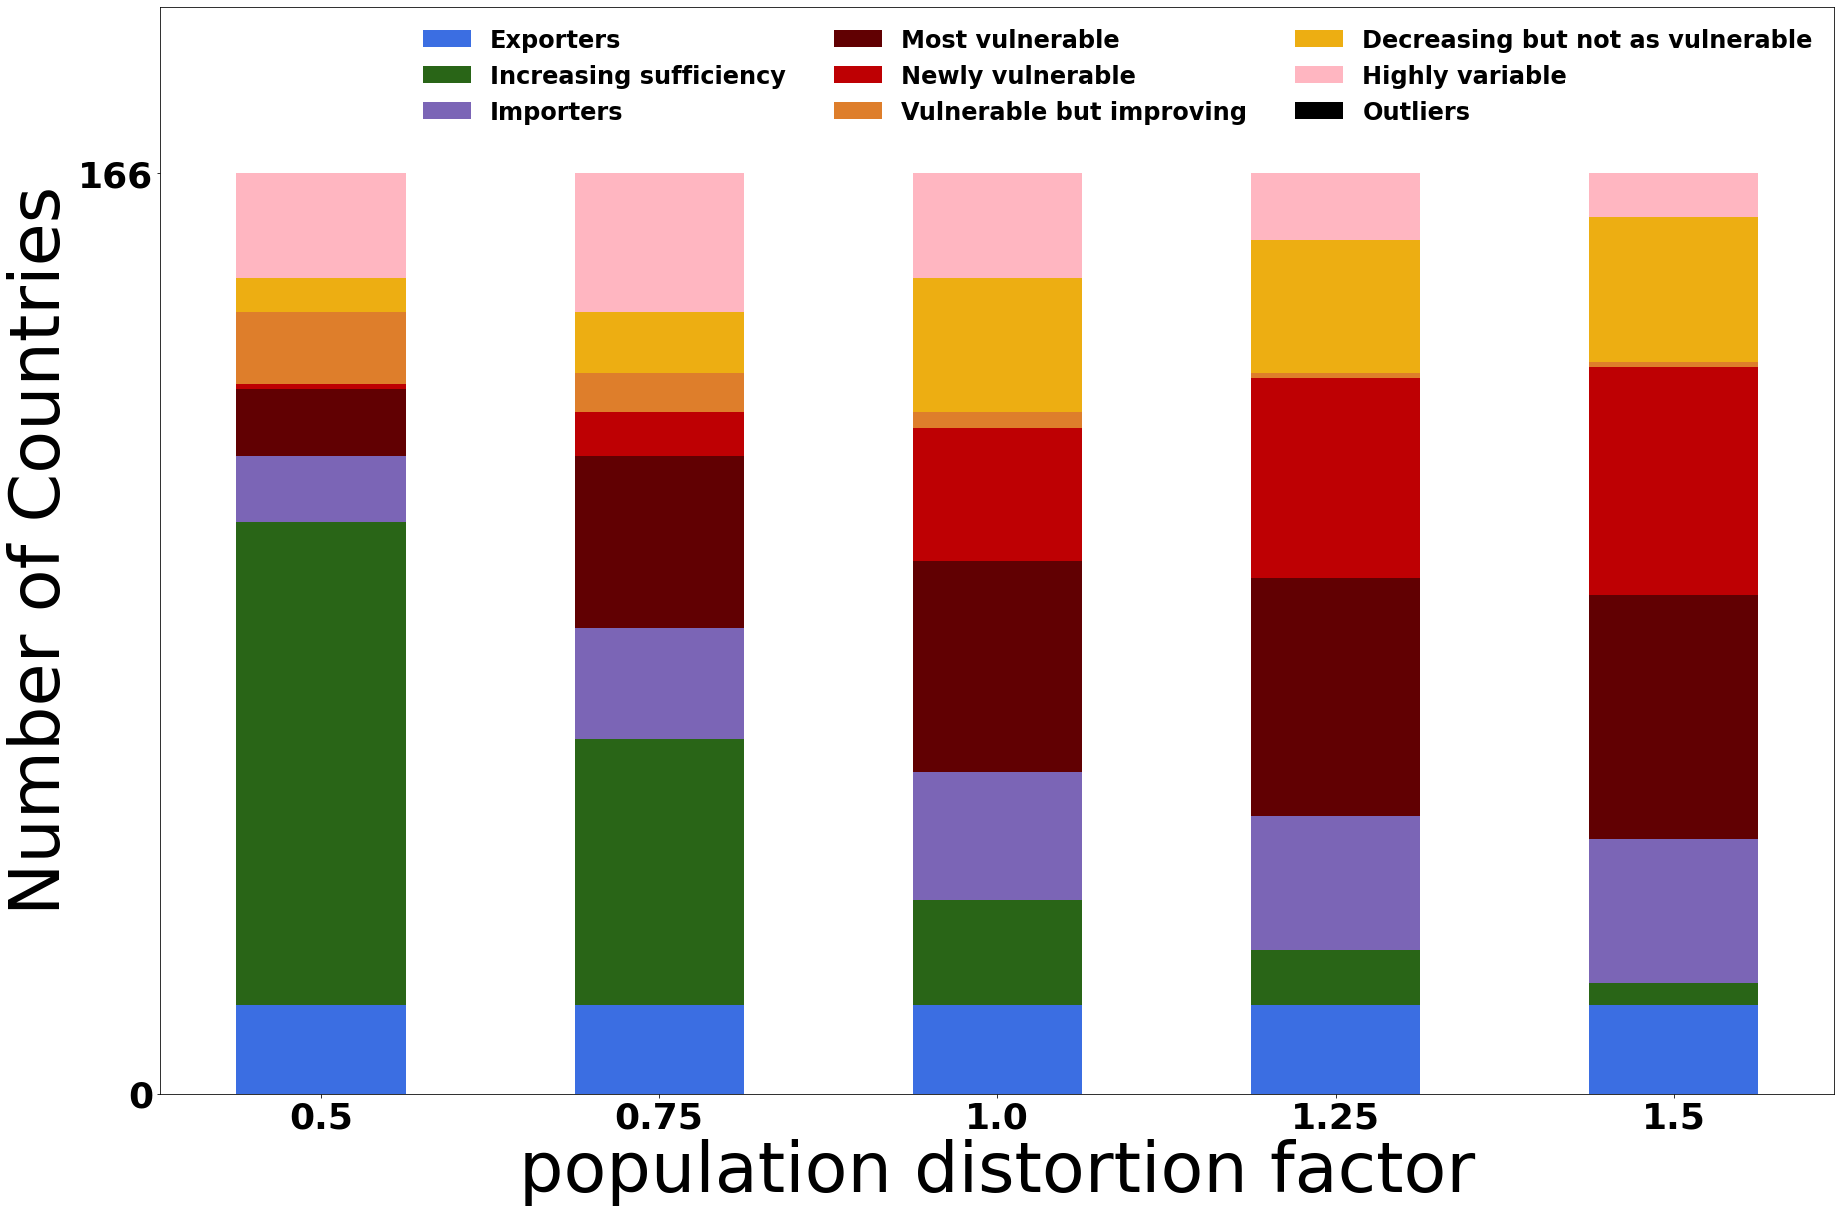

In [643]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = np.array([0.5 , 0.75, 1.  , 1.25, 1.5])

cat1 = np.array(cat1)
cat2 = np.array(cat2)
cat3 = np.array(cat3)
cat4 = np.array(cat4)
cat5 = np.array(cat5)
cat6 = np.array(cat6)
cat7 = np.array(cat7)
cat8 = np.array(cat8)
cat9 = np.array(cat9)

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('population distortion factor', fontsize=70)
plt.ylim([0,196])
plt.yticks([0, 166],fontsize=36)
plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## Code for SA (Yield and Cropland)

In [570]:
values = np.round(np.array([.5, .75, 1., 1.25, 1.5]), 2)
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']

for value in list(values):    
    
    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    for country in list(countries):
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    
    
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            df_dup = df_ssp[df_ssp['ISO3']==country].copy()
            df_dup['%cropland_2050'] = df_dup['%cropland_2050'].apply(lambda x: value * x)

            df_dup.loc[:, 'calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_dup, cntry=country, year=2050)
    
        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')
    
    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05
    suffies = suffies.dropna(subset=['trade'])
    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category')
    
    
    suffice['value'] = value
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


In [571]:
stacked_df.to_csv('sa_cropland_170.csv')

## SA for crop yield

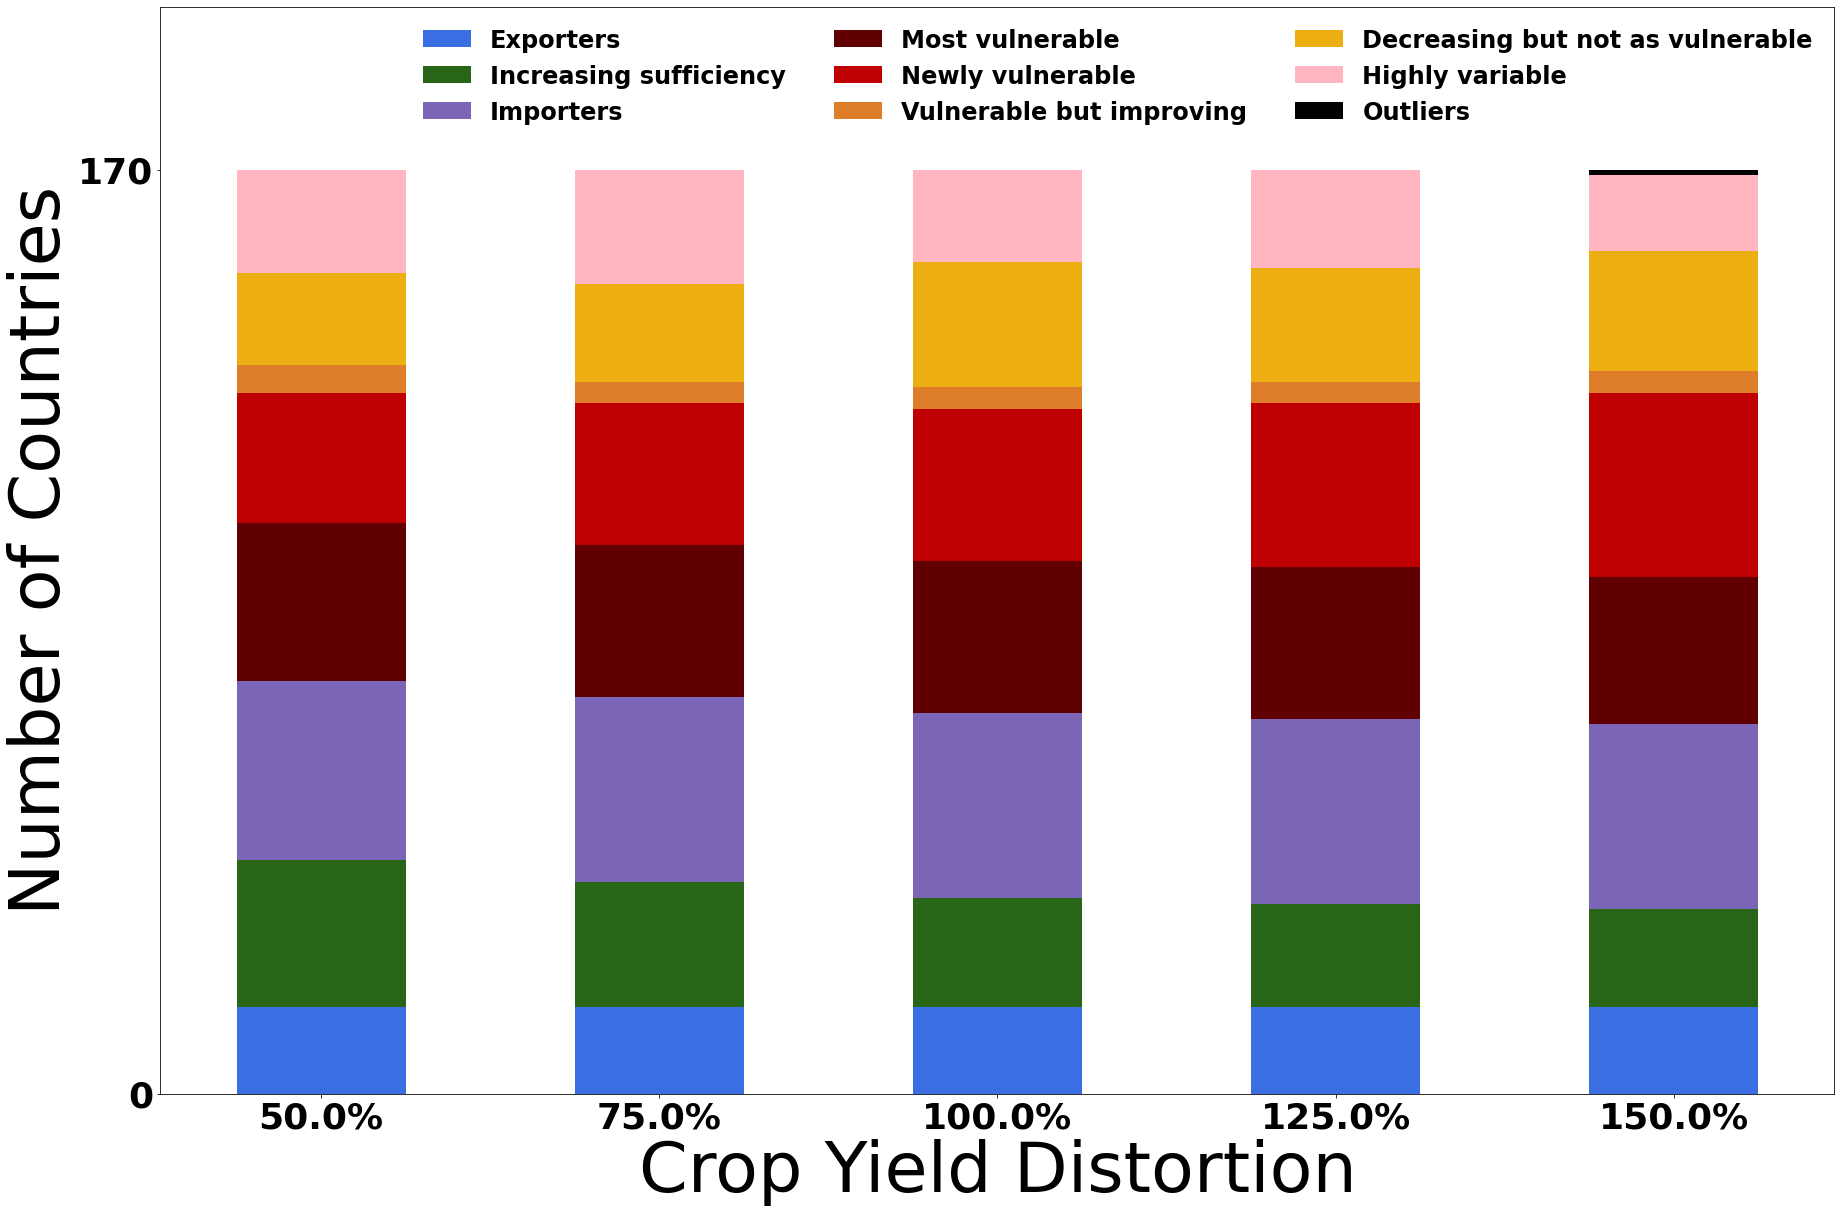

In [601]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [str(e)+'%' for e in list(np.round(100 * np.array([.5, .75, 1., 1.25, 1.5]),2))]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([ 4,  9, 20, 37, 53])
cat3 = np.array([37, 36, 34, 33, 32])
cat4 = np.array([36, 30, 28, 23, 20])
cat5 = np.array([48, 39, 28, 20, 15])
cat6 = np.array([0, 5, 4, 6, 4])
cat7 = np.array([24, 24, 23, 11,  7])
cat8 = np.array([ 5, 11, 17, 24, 23])
cat9 = np.array([0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('Crop Yield Distortion', fontsize=70)
plt.ylim([0,200])
plt.yticks([0, 170],fontsize=36)
plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

## SA for %cropland

In [582]:
cat9

array([0, 0, 0, 0, 0])

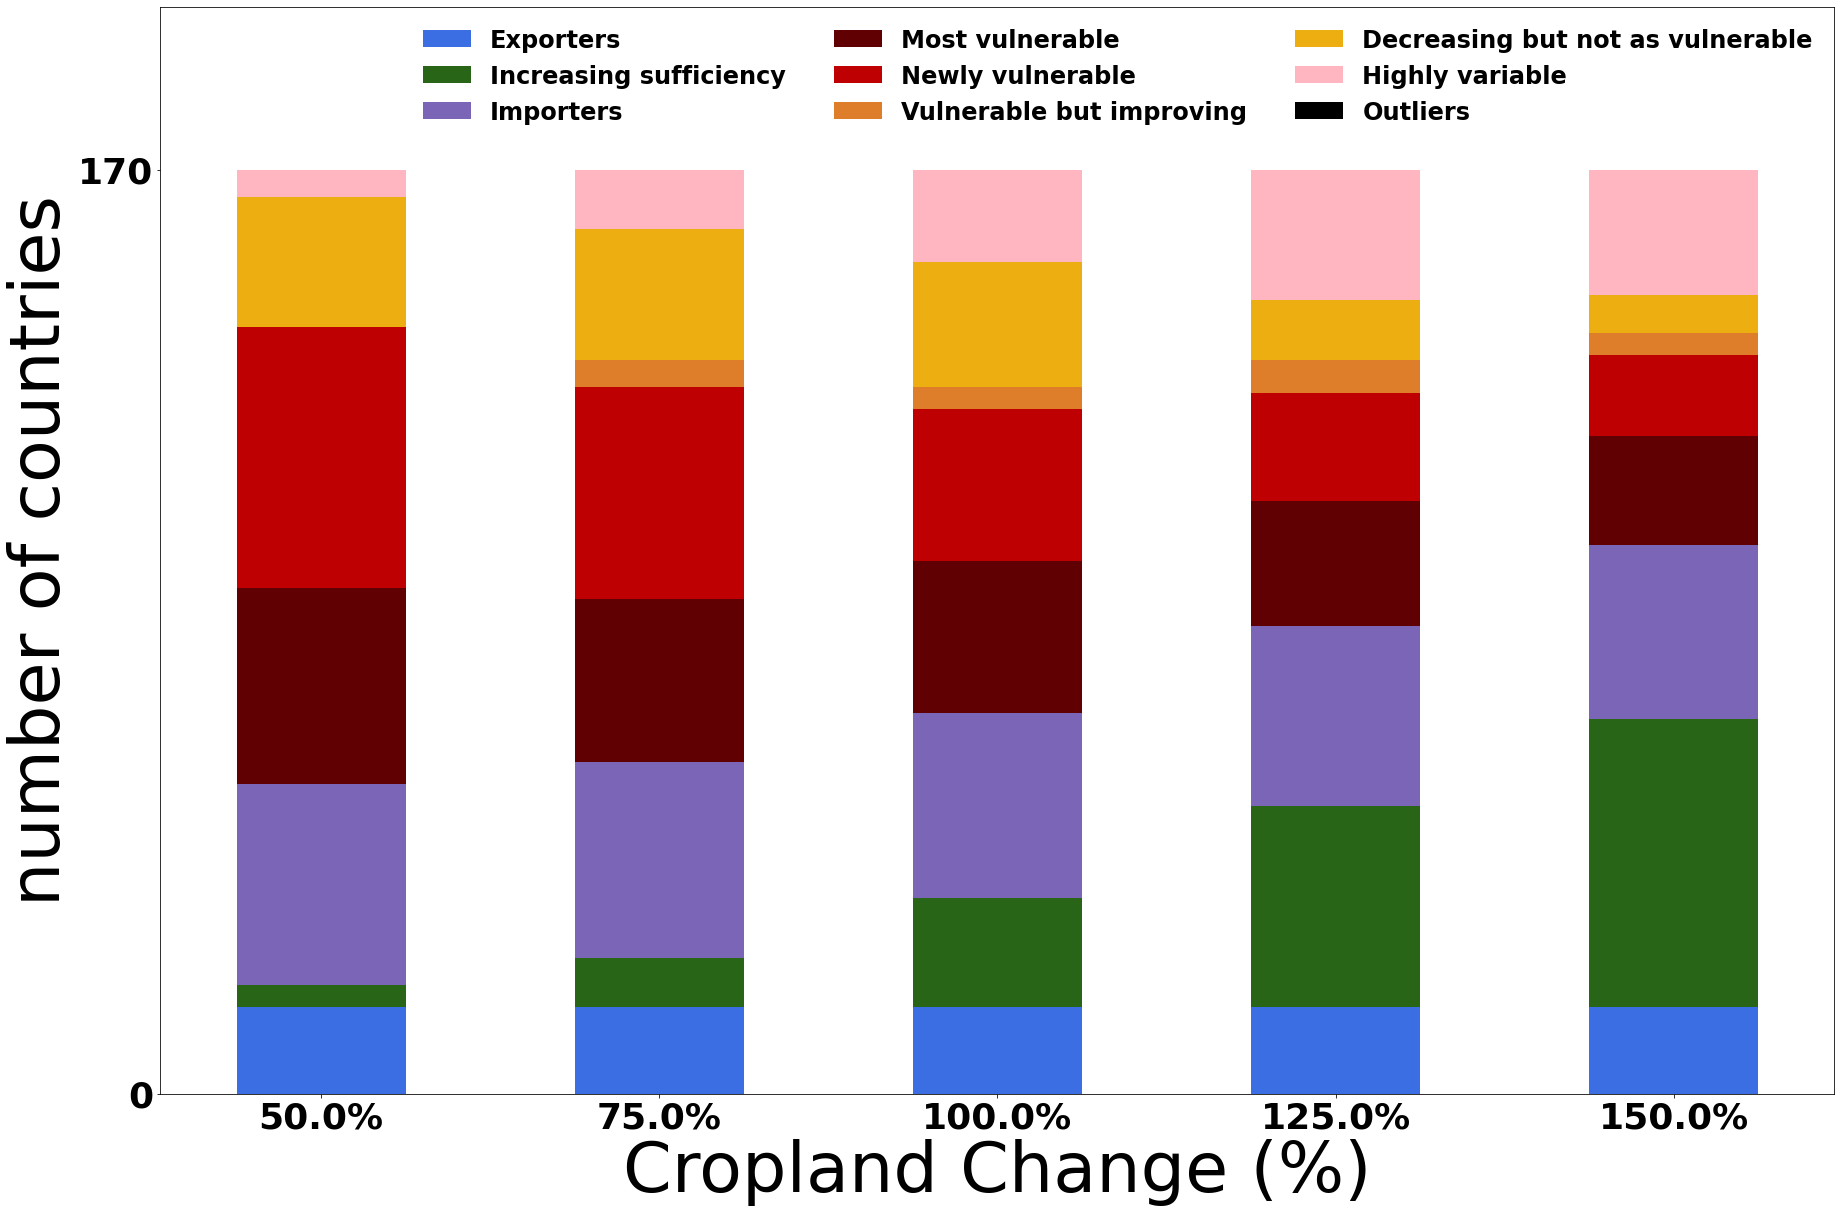

In [602]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='bold')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

values = [str(e)+'%' for e in list(np.round(100 * np.array([.5, .75, 1., 1.25, 1.5]),2))]

cat1 = np.array([16, 16, 16, 16, 16])
cat2 = np.array([ 4,  9, 20, 37, 53])
cat3 = np.array([37, 36, 34, 33, 32])
cat4 = np.array([36, 30, 28, 23, 20])
cat5 = np.array([48, 39, 28, 20, 15])
cat6 = np.array([0, 5, 4, 6, 4])
cat7 = np.array([24, 24, 23, 11,  7])
cat8 = np.array([ 5, 11, 17, 24, 23])
cat9 = np.array([0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=36)
plt.xlabel('Cropland Change (%)', fontsize=70)
plt.ylim([0,200])
plt.yticks([0, 170],fontsize=36)
plt.ylabel('number of countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

In [11]:
# function that generates samples, calculates cal_suf for parametric variables ['food_waste', 'diet', 'feed_food_factor', 'pop_fact']
# returns  tuples of (sample, cal_suf)
# discriminates by year, ssp and country if need be

def sensitivity(random=False, var='food_waste', value=np.array([.5, .75, 1., 1.25, 1.5]), ssp=1, year=2050, country=None, **kwargs):
    
    data_path = 'outputs/compare/'
    df_ssp = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
    
    if country:
        df_ssp = df_ssp[df_ssp['ISO3']==country]

    if random:
        sample = sample_var(**kwargs)
        
    else:
        sample = value
    
    if var=='food_waste':
        sufficiency = cal_suff(df_ssp, year, cntry=country, food_waste=sample)
        
    if var=='diet':
        sufficiency = cal_suff(df_ssp, year, cntry=country, diet=sample)
        
    if var=='feed_food_factor':
        sufficiency = cal_suff(df_ssp, year, cntry=country, feed_food_factor=sample)
    
    if var=='pop_fact':
        sufficiency = cal_suff(df_ssp, year, cntry=country, pop_fact=sample)
        
    return sample, sufficiency

sensitivity(var='diet', ssp=5, country='MAR', n=1, dist='unif')

(array([0.145, 0.174, 0.203, 0.232, 0.261, 0.29 , 0.319, 0.348, 0.377,
        0.406, 0.435]),
 array([0.98458219, 0.95431082, 0.92584534, 0.89902883, 0.87372204,
        0.84980096, 0.82715482, 0.80568434, 0.78530027, 0.76592219,
        0.74747744]))

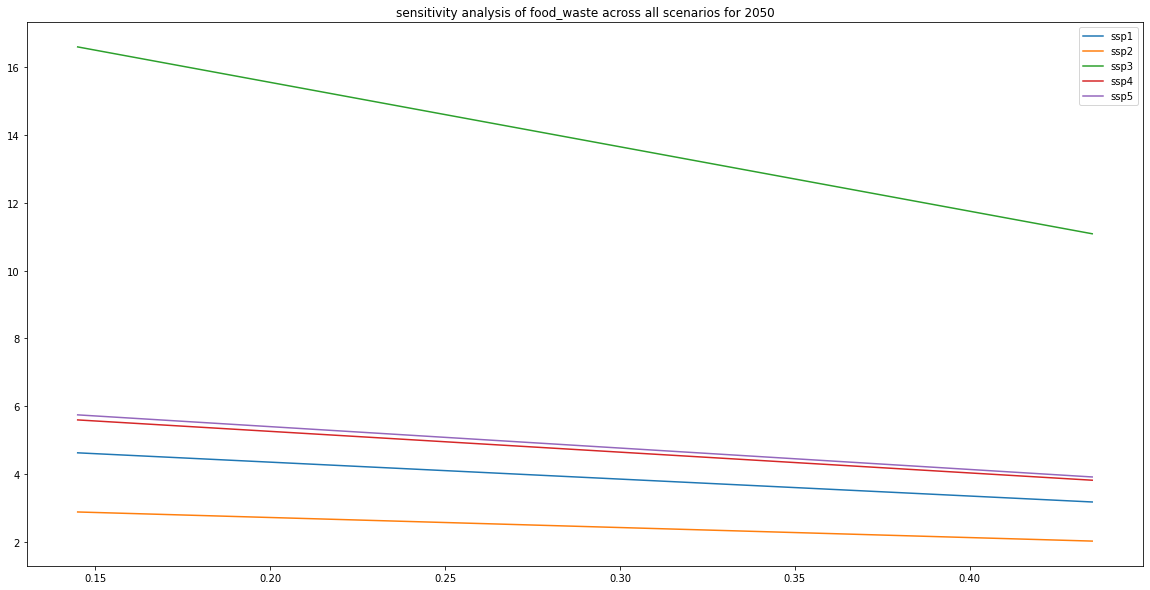

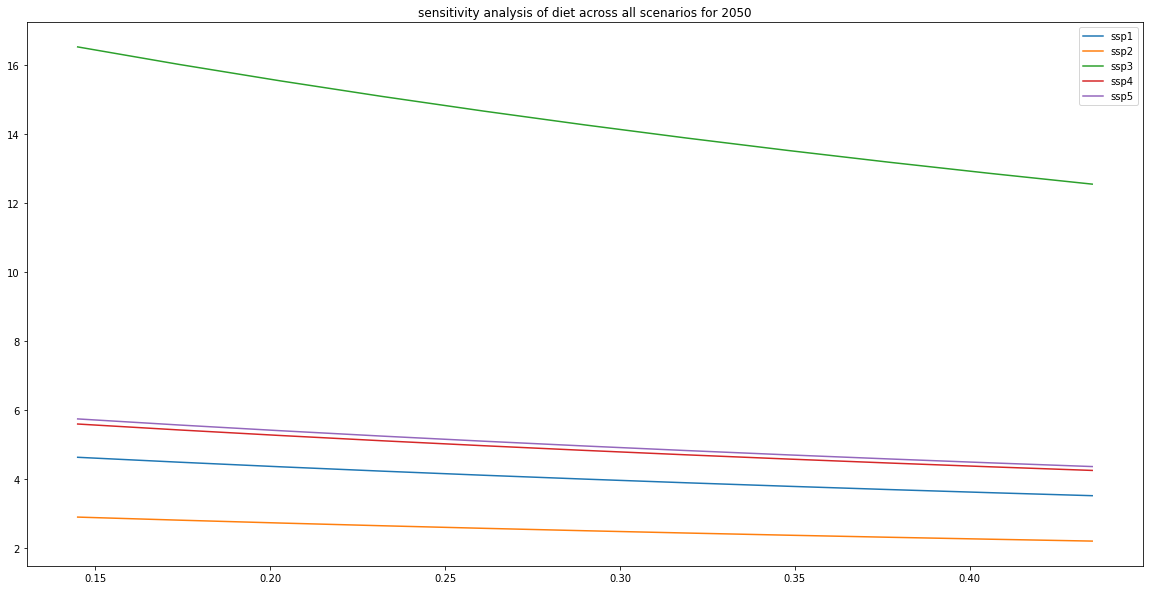

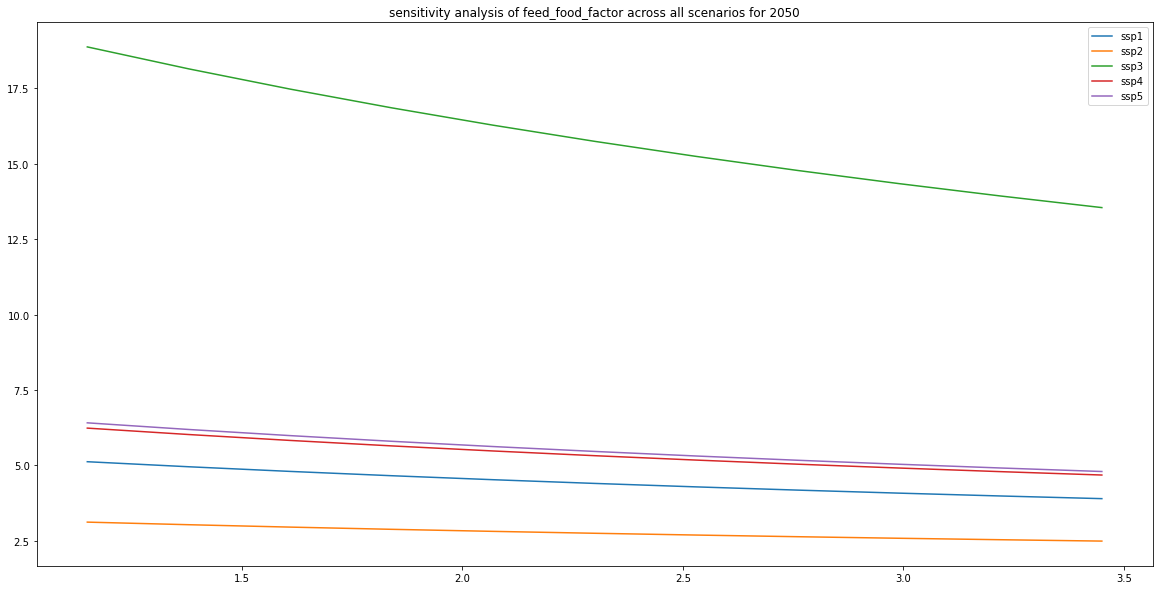

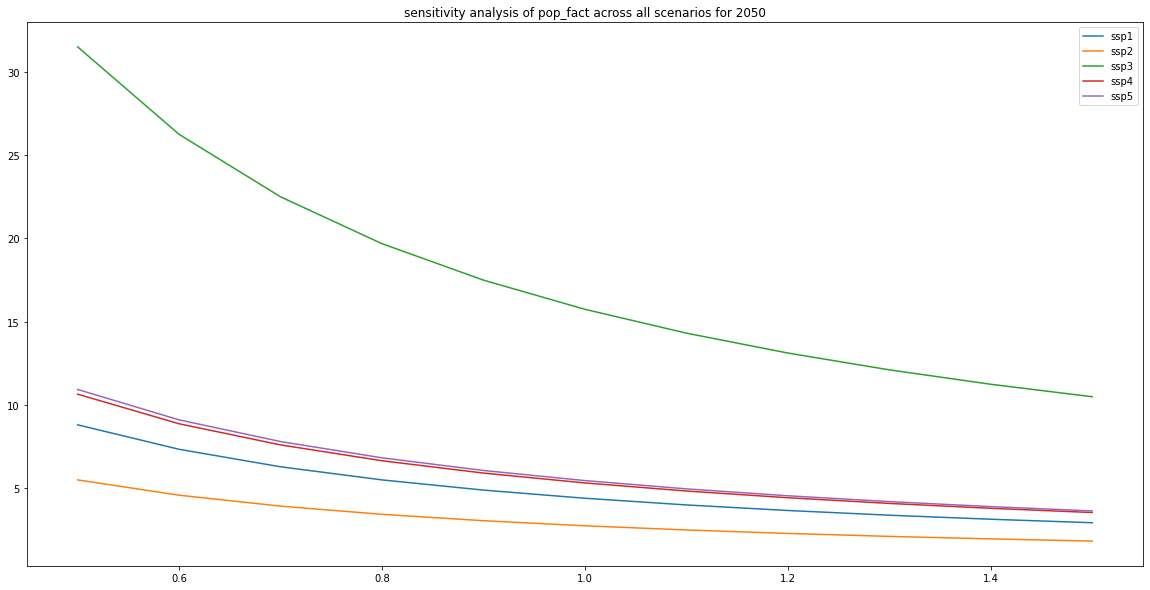

In [13]:
params = ['food_waste', 'diet', 'feed_food_factor']
lows = [0., 0., 2.3]
highs = [.5, 1., 1.]
dists = ['unif', 'unif', 'norm']
year=2050

cols = [
    'value',
    'ssp1_global',
    'ssp2_global',
    'ssp3_global',
    'ssp4_global',
    'ssp5_global',
]

values = [
    np.round(.29 * np.array([.5, .75, 1., 1.25, 1.5]), 2),
    np.round(.29 * np.array([.5, .75, 1., 1.25, 1.5]), 2),
    np.round(2.3 * np.array([.5, .75, 1., 1.25, 1.5]), 2),
    
]

df_global = pd.DataFrame(columns=cols)

for s, param in enumerate(params):
    plt.figure(figsize=(20,10))
    for i in range(5):
        x, y = sensitivity(var=param, ssp=i+1, year=year, country=None,n=1000, value=values[s])
        df_global.loc[:, 'value'] = x
        df_global.loc[:, 'ssp'+str(i+1)+'_global'] = y
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]
        plt.plot(x, y, label='ssp'+str(i+1))
        plt.legend()
        
    df_global.to_csv('sa_glo_'+param+'_new.csv')

    plt.title('sensitivity analysis of '+param+' across all scenarios for '+str(year))
    plt.show()

In [477]:
# function that generates samples, calculates cal_suf for predicted values ['cropland', 'yield']
# returns  tuples of (sample, cal_suf)
# discriminates by year, ssp and country if need be

def sensitivity_2(random=False, var='cropland', ssp=1, year=2050, country=None, **kwargs):
    var_dict = {'cropland': '%cropland_2050', 'yield':'cal_per_ha_pred', 'population':'population_2050'}
    sufficiency = []
    
    data_path = 'outputs/compare/'
    df_ssp = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
    
    if random:
        sample = sample_var(**kwargs)
        
    else:
        sample = np.array([.5, .75, 1., 1.25, 1.5])
    
    if country:
        df_ssp = df_ssp[df_ssp['ISO3']==country]
        
    df_dup = df_ssp.copy()
#     sample = sample_var(**kwargs)
    for smp in list(sample):
        if var=='population':
            sufficiency.append(cal_suff(df_dup, cntry=country, pop_fact=smp))
        else:
            df_dup[var_dict[var]] = df_ssp[var_dict[var]]*smp
            df_dup['calories_2050'] = df_dup['%cropland_2050'] * df_dup['cal_per_ha_pred'] * df_dup['ha_per_pixel']
            sufficiency.append(cal_suff(df_dup, cntry=country))
    if var=='population':
        return ((sample * df_ssp[var_dict[var]].sum())), np.array(sufficiency)
    else:
        return ((sample * df_ssp[var_dict[var]].mean()) - (df_ssp[var_dict[var][:-4]+'2000'].mean())), np.array(sufficiency)

sensitivity_2(var='yield', ssp=5, country='USA', n=1, low=1., high=.02, dist='norm')

(array([8.80661387e+09]), array([2.01153905]))

<Figure size 1440x720 with 0 Axes>

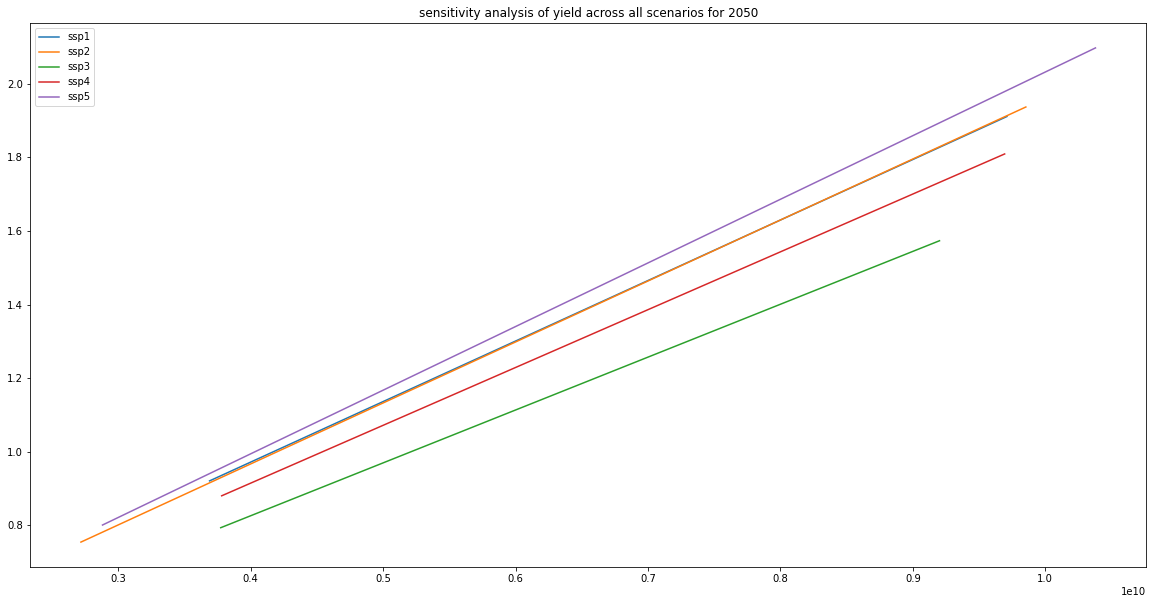

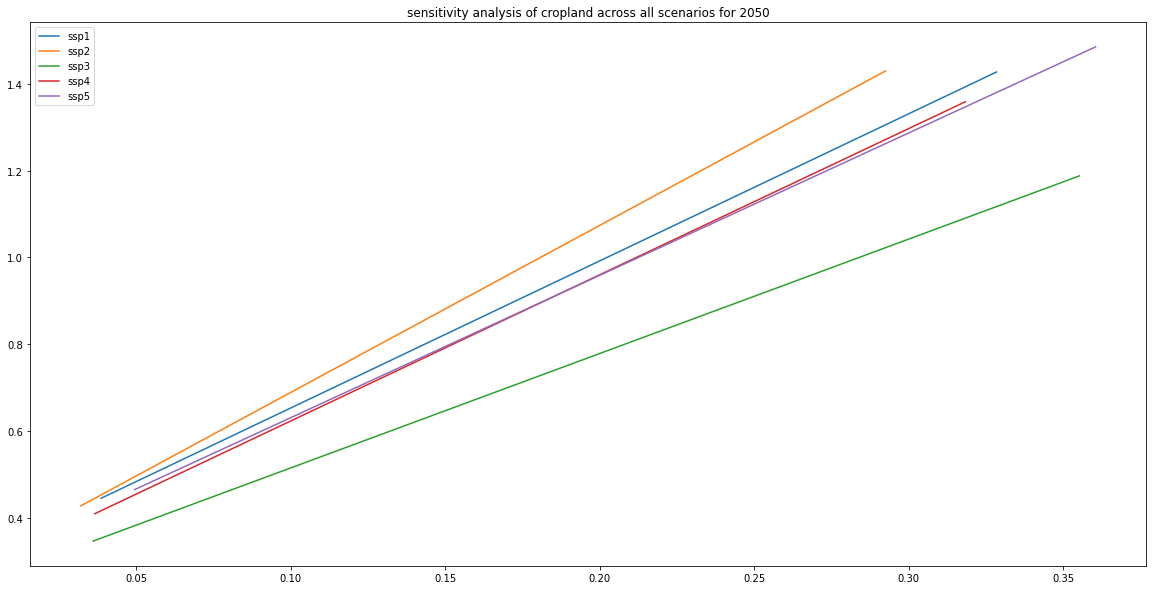

In [489]:
plt.figure(figsize=(20,10))

params = ['yield', 'cropland', 'population']

year=2050

cols = [
    'value',
    'ssp1_global',
    'ssp2_global',
    'ssp3_global',
    'ssp4_global',
    'ssp5_global',
]


# for param, low, high, dist in zip(params, lows, highs, dists):
for param in params:
    plt.figure(figsize=(20,10))
    df_global = pd.DataFrame(columns=cols)
    for i in range(5):
        x, y = sensitivity_2(var='population', ssp=i+1)
        to_stack = pd.DataFrame(np.array([x,y]).T, columns=['value', 'ssp'+str(i+1)+'_global'])
        df_global = pd.concat([df_global, to_stack])
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]
        plt.plot(x, y, label='ssp'+str(i+1))
        plt.legend()

    plt.title('sensitivity analysis of '+param+' across all scenarios for '+str(year))
    plt.show()
    df_global.sort_values(by='value').interpolate().to_csv('sa_glo_'+param+'.csv', index=False)

In [ ]:
df_cat = pd.read_csv('sa_pop_fact2.csv')
df_out = pd.DataFrame(columns=df_cat.columns)
df_out['value'] = df_global['value'].copy()
categ_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']

for i in range(5):
    for (j,col) in enumerate(categ_cols):
        if col[:4] == 'ssp'+str(i+1):
            df_out.iloc[(5*i):(5*(i+1)), j] = df_cat[col]

for col in df_out.columns:
    df_out[col] = df_out[col].astype('float')
    
df_out.sort_values(by='value').interpolate().to_csv('inter_population_out.csv')